In [3]:
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import pandas as pd
import seaborn as sb
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Load dataset
df = pd.read_csv("../data/IFND.csv", encoding="ISO-8859-1")  # Update path as needed

df.head(10)

[nltk_data] Downloading package stopwords to /home/vivi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vivi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/vivi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vivi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE
5,7,Bihar Assembly Election 2020: This is why Tej ...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE
6,8,"Hathras case: CBI reaches victim's village, vi...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
7,9,"Rajasthan Crime News: After Karauli, another e...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
8,10,"Mumbai: BMC to book, penalise people stepping ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
9,11,COVID-19: India's single-day spike drops to 55...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE


In [4]:
print(f'Data rows: {df.shape[0]}, Data columns: {df.shape[1]}')

Data rows: 56714, Data columns: 7


In [5]:
df.isna().sum()


id               0
Statement        0
Image            0
Web              0
Category         0
Date         11321
Label            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dropna(inplace=False)
df.drop_duplicates(inplace=False)
print(f'Data rows after cleaning: {df.shape[0]}, Data columns after cleaning: {df.shape[1]}')

Data rows after cleaning: 56714, Data columns after cleaning: 7


In [8]:
def clean_text(text):
    # Converting all text to lowercase
    text = text.lower()
    
    # Delete link/URL
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)
    
    # Delete emoji and characters non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Normalize Words
    text = re.sub(r"won\'t", "would not", text)
    text = re.sub(r"im", "i am", text)
    text = re.sub(r"Im", "i am", text)
    text = re.sub(r"dont", "do not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    # Remove punctuation and other symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    
    # Delete numbers
    text = re.sub(r'\d+', ' ', text)
    
    # Removing double spaces that may form
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text
df['Statement'] = df['Statement'].apply(clean_text)

# Example usage
sample_text = "Breaking News! Fake news spreads quickly on social media."
print(clean_text(sample_text))

breaking news fake news spreads quickly on social media


In [9]:
df.sample(5)

,id,Statement,Image,Web,Category,Date,Label
42318,42320,fact check quote attributed to nitin gadkari p...,https://newsmobile.in/wp-content/uploads/2020/...,NEWSMOBILE,GOVERNMENT,20-Aug,Fake
42358,42360,fact check this picture of burnt cars is not f...,https://newsmobile.in/wp-content/uploads/2020/...,NEWSMOBILE,MISLEADING,20-Aug,Fake
46368,46370,poster clai aming fix rate for shaheen bagh pr...,https://cmsimages.tribuneindia.com/gallary_co...,AUGMENT,VIOLENCE,NaN,Fake
121,123,data between asian american voters grew by mor...,https://factly.in/wp-content/uploads//2020/08/...,FACTLY,POLITICS,Aug-20,TRUE
1563,1565,heavy rains lash delhi adjoining states severe...,https://www.thestatesman.com/wp-content/upload...,THESTATESMAN,GOVERNMENT,Aug-20,TRUE


In [10]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.split()
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(processed_words)

df['Statement'] = df['Statement'].apply(preprocess_text)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56714 entries, 0 to 56713
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         56714 non-null  int64 
 1   Statement  56714 non-null  object
 2   Image      56714 non-null  object
 3   Web        56714 non-null  object
 4   Category   56714 non-null  object
 5   Date       45393 non-null  object
 6   Label      56714 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.0+ MB


In [ ]:
df = df[['Statement', 'Label']]
df.head()

,Statement,Label
0,prais india aarogya setu app say help identifi...,TRUE
1,delhi deputi us secretari state stephen biegun...,TRUE
2,lac tension china strategi behind deliber fail...,TRUE
3,india sign document space cooper countri isro ...,TRUE
4,tamil nadu chief minist mother pass away,TRUE


/tmp/ipykernel_74532/1844982484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x='Label', data=dataFile, palette='hls')


<Axes: xlabel='Label', ylabel='count'>

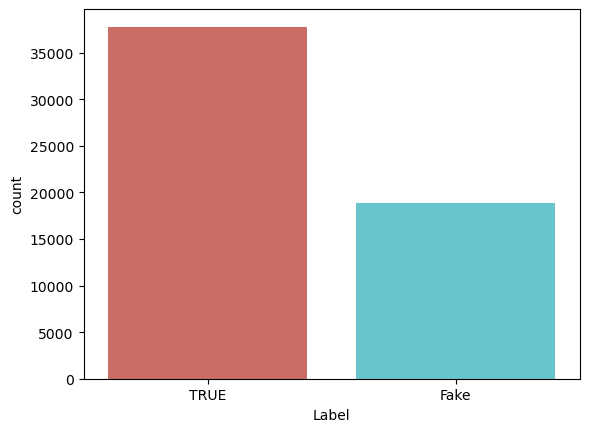

In [13]:
def create_distribution(dataFile):
    return sb.countplot(x='Label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(df)

In [14]:
def data_qualityCheck():
    print("Checking data qualitites...")
    df.isnull().sum()
    df.info()  
    print("check finished.")
data_qualityCheck()

df = df.dropna()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56714 entries, 0 to 56713
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  56714 non-null  object
 1   Label      56714 non-null  object
dtypes: object(2)
memory usage: 886.3+ KB
check finished.


In [15]:
print(df.columns)
df.shape
print(df.columns)

Index(['Statement', 'Label'], dtype='object')
Index(['Statement', 'Label'], dtype='object')


In [16]:
print(df.columns)
df.reset_index(drop= True,inplace=True)
df.head(10)

Index(['Statement', 'Label'], dtype='object')


,Statement,Label
0,prais india aarogya setu app say help identifi...,TRUE
1,delhi deputi us secretari state stephen biegun...,TRUE
2,lac tension china strategi behind deliber fail...,TRUE
3,india sign document space cooper countri isro ...,TRUE
4,tamil nadu chief minist mother pass away,TRUE
5,bihar assembl elect tej pratap shift mahua has...,TRUE
6,hathra case cbi reach victi villag visit cri a...,TRUE
7,rajasthan cri ame news karauli anoth elderli b...,TRUE
8,mumbai bmc book penalis peopl step without fac...,TRUE
9,covid india singl day spike drop talli approac...,TRUE


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df.Label = label_encoder.fit_transform(df.Label)

In [18]:
Label_train = df.Label


In [19]:
Label_train.head(10)  # 1 for real news, 0 for fake news


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Label, dtype: int64

In [20]:
df.drop('Label', axis=1, inplace=True)

In [21]:
df.head(10)

,Statement
0,prais india aarogya setu app say help identifi...
1,delhi deputi us secretari state stephen biegun...
2,lac tension china strategi behind deliber fail...
3,india sign document space cooper countri isro ...
4,tamil nadu chief minist mother pass away
5,bihar assembl elect tej pratap shift mahua has...
6,hathra case cbi reach victi villag visit cri a...
7,rajasthan cri ame news karauli anoth elderli b...
8,mumbai bmc book penalis peopl step without fac...
9,covid india singl day spike drop talli approac...


In [22]:
df['Statement'][2188]

'includ yoga part onlin learn programm vice presid venkaiah naidu'

In [23]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [24]:
stpwrds

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [25]:
print(df.columns)

Index(['Statement'], dtype='object')


In [26]:
for x in range(len(df)) :
    corpus = []
    review = df['Statement'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    df.loc[x,'Statement'] = review

In [27]:
df['Statement'][2188]

'includ yoga part onlin learn programm vice presid venkaiah naidu'

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['Statement'], Label_train, test_size=0.3, random_state=42)

In [29]:
X_train.shape, y_train.shape

((39699,), (39699,))

In [30]:
X_train

49411    pictur proof india latest counter terror fact ...
838      gst compens neet jee exam mamata sonia uddhav ...
25478          rupaul drag race favorit chi chi devayn die
41469    fals migrant labour travel special train wast ...
10252    sushant death case rhea appear cbi first ti am...
                               ...                        
54343    fact check pictur hizbul command zakir musa fa...
38158         fact check viral photo flood bihar australia
860      sushant singh rajput case uddhav never interfe...
15795            migrant way home die injur separ incid mp
56422                       believ pictur pm modi take dip
Name: Statement, Length: 39699, dtype: object

In [31]:
y_train

49411    0
838      1
25478    1
41469    0
10252    1
        ..
54343    0
38158    0
860      1
15795    1
56422    0
Name: Label, Length: 39699, dtype: int64

In [32]:
X_test

25353      man phone like make histori highest auction bid
4091     pm state start plan vaccin rollout maintain fa...
28346    du survey show akhilesh maya popular modi priy...
16648    regist first case anti convers law bareilli di...
41227    fact check old video statu ganesha ammers rive...
                               ...                        
20220    china admit lose less troop includ offic clash...
14400    ahead rajya sabha poll two gujarat cong mla re...
12903              woman deliv babi stand queue covid test
32519                 capit set covid vaccin rollout today
18698    farooq abdullah question ed rahul slam centr s...
Name: Statement, Length: 17015, dtype: object

In [33]:
# Preprocessing
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000)
vec_X_train = vectorizer.fit_transform(X_train)
vec_X_test = vectorizer.transform(X_test)

# Save the trained vectorizer
with open("../models/INDI_vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

In [34]:
vec_X_train.shape, vec_X_test.shape

((39699, 5000), (17015, 5000))

In [35]:
import itertools

import numpy as np


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

In [36]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Train Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(), #max_iter=1000
    "Random Forest": RandomForestClassifier(), #n_estimators=100
    "Decision Tree": DecisionTreeClassifier(),
    "PassiveAggressive" : PassiveAggressiveClassifier(),
    # "SVM": SVC(),
    # "SVM2" : SVC(probability=True, kernel='rbf'),
}

In [37]:
import numpy as np
from sklearn import metrics

accuracies = {}
for name, model in models.items():
    model.fit(vec_X_train, y_train)
    y_pred = model.predict(vec_X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f'{name} Accuracy: {round(acc*100,2)}%')
    
    # Save model
    with open(f"../models/{name.replace(' ', '_').lower()}.pkl", "wb") as f:
        pickle.dump(model, f)

Naive Bayes Accuracy: 92.58%
Logistic Regression Accuracy: 93.28%
Random Forest Accuracy: 93.88%
Decision Tree Accuracy: 91.75%
PassiveAggressive Accuracy: 92.08%


In [38]:

classifier = PassiveAggressiveClassifier()
classifier.fit(vec_X_train,y_train)

PassiveAggressiveClassifier()

Accuracy: 92.61%
Confusion matrix, without normalization


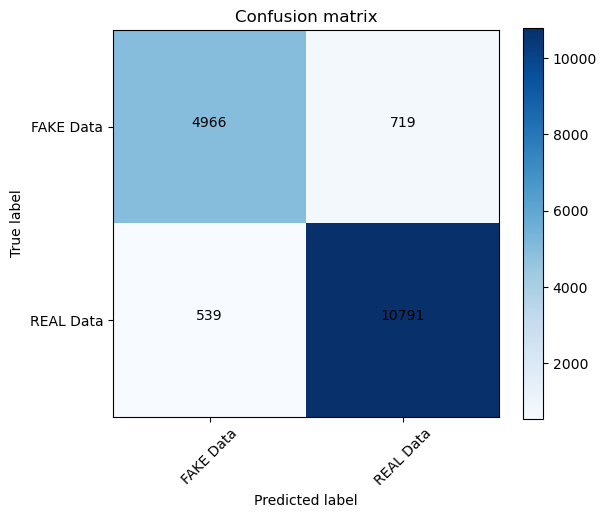

In [39]:

Y_pred = classifier.predict(vec_X_test)
score = metrics.accuracy_score(y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

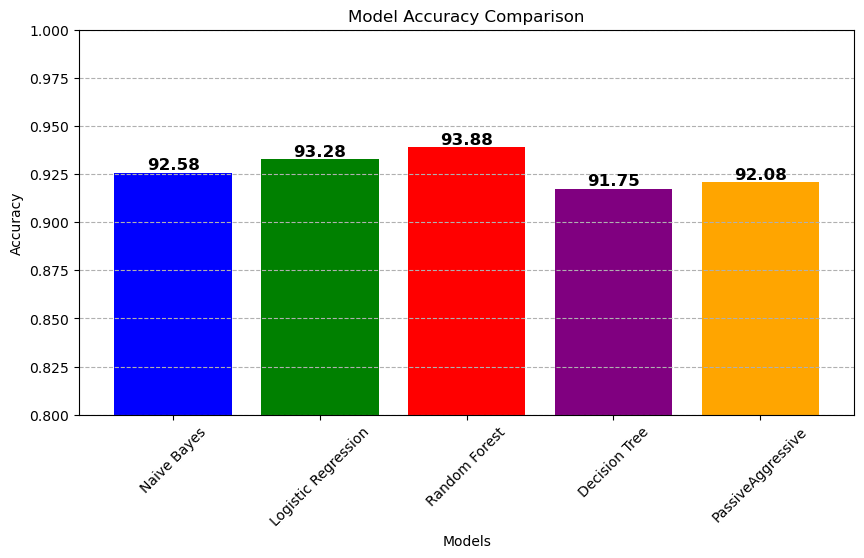

In [40]:



        
# Plot improved accuracy comparison graph
plt.figure(figsize=(10,5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])

# Adding value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval*100,2)}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0.8, 1)  # Accuracy y-axis ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()


In [41]:
import pandas as pd

def output_label(n):
    return "Fake News" if n == 0 else "Not A Fake News"

def manual_testing(news):
    # Ensure 'models' contains trained models
    for name, model in models.items():  # FIXED: Use `models.items()` instead of `models()`
        
        # Create a DataFrame for input news
        testing_news = {"text": [news]}
        new_def_test = pd.DataFrame(testing_news)

        # Apply text preprocessing (Ensure 'clean_text' is defined)
        new_def_test['text'] = new_def_test["text"].apply(clean_text)  

        # Transform input using the loaded vectorizer
        new_xv_test = vectorizer.transform(new_def_test["text"])  

        # Get model predictions
        test_pred = model.predict(new_xv_test)  
        
        # Print prediction correctly
        print(f"{name} Prediction: {output_label(test_pred[0])}")  # FIXED: Index test_pred

In [42]:
news ="Federal health officials told the AP they have not received any reports of Ebola cases at the Nevada event. A screenshot of a supposed post from the Centers for Disease Control and Prevention confirming such cases was fabricated. And there is no record of a national emergency being declared. The claims emerged after summer storm left muddy roads flooded, stranding tens of thousands of partygoers; event organizers let traffic flow out of the main road Monday afternoon. “So it was announced earlier that Burning Man was declared a national emergency because it was flooded, and so they sent in FEMA,” a woman claims in a TikTok video shared on Instagram, suggesting the development was suspicious. The AP found no record, including on federal websites and in White House announcements, of a national emergency declaration and FEMA confirmed that it was not involved in the situation. “No FEMA personnel or assets have been deployed to the Burning Man festival and there are no requests from local or state authorities for our assistance,” FEMA spokesperson Jeremy Edwards said in an email. The TikTok video, like other posts, goes on to relay baseless rumors of reported cases of Ebola, whose occasional outbreaks in humans primarily occur in Africa, at the festival. Some posts also shared an image made to appear that the CDC confirmed the supposed outbreak on X, the platform formerly known as Twitter. The purported X post from the agency reads, “Ebola outbreak confirmed at Black Rock City, NV. It is recommended that all Burning Man attendees remain in their dwellings until further notice. Current State of Emergency in progress.” But the CDC’s X account published no such post. “CDC has not received any reports of Ebola at the Burning Man Festival and has not issued any warnings or had any requests for assistance from the state and local health departments either,” agency spokesperson Scott Pauley said in an email. Reverse image searches further show that a graphic about Ebola used in the fictitious CDC post was published by the agency in 2016, but elements of it were changed. For example, the original graphic asks, “Recently in West Africa?” But the version used in the made-up X post asks, “Recently in Nevada?” Referencing more online rumors, Pauley also noted the CDC had not received reports of mpox, formerly known as monkeypox, or Marburg, a rare but severe hemorrhagic fever, in relation to Burning Man. A representative for the Burning Man Project organization also refuted the online claims. “Quite simply, the online rumors of transmissible illnesses in Black Rock City are unfounded and untrue,” Dominique Debucquoy-Dodley said in an email. The festival had been closed to vehicles after more than a half-inch (1.3 centimeters) of rain fell Sept. 1, causing flooding and foot-deep mud, as the AP reported. The annual gathering, which launched on a San Francisco beach in 1986, attracts nearly 80,000 artists, musicians and activists for a mix of wilderness camping and avant-garde performances"
manual_testing(news)

Naive Bayes Prediction: Not A Fake News
Logistic Regression Prediction: Not A Fake News
Random Forest Prediction: Fake News
Decision Tree Prediction: Fake News
PassiveAggressive Prediction: Not A Fake News


In [43]:
news = "MOSCOW (Reuters) - Russiaâ€™s former ambassador to Washington, Sergei Kislyak, said on Saturday his conversations with former White House national security adviser Michael Flynn had been transparent and focused on matters of U.S.-Russia cooperation. Kislyak ended his tenure in Washington in July but remains a key figure in ongoing U.S. investigations into Moscowâ€™s alleged meddling in the 2016 presidential election. Flynn was forced to resign in February after it became known that he had failed to disclose the content of conversations he had with Kislyak and misled U.S. Vice-President Mike Pence about their meetings. â€œWe only spoke about the most simple things ... but the communication was completely correct, calm, absolutely transparent. In any case, there were no secrets on our side,â€ Kislyak said during a panel discussion on Russian television. â€œThere are a number of issues which are important for cooperation between Russia and the United States - most of all, terrorism. And that was one of the things we discussed.â€"
manual_testing(news)

Naive Bayes Prediction: Not A Fake News
Logistic Regression Prediction: Not A Fake News
Random Forest Prediction: Not A Fake News
Decision Tree Prediction: Fake News
PassiveAggressive Prediction: Not A Fake News
